In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = [20, 18]
plt.rcParams['figure.dpi'] = 100

In [2]:
df = pd.read_csv('zoo.csv')

In [3]:
df.head()

name  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         1         0     0     4     0         0        1     1  
1         1         1         0     0     4     1         0        1     1  
2         1         0         0     1     0     1         0        0     4  
3         1         1         0     0     4     0         0        1     1  
4         1         1         0     0     4     1         0        1     1

In [4]:
df = df.set_index('name')

In [5]:
from sklearn.preprocessing import StandardScaler

features = df.columns.difference(['type'])
x = df.loc[:, features].values
y = df.loc[:,['type']].values
x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle',svd_solver = 'full')

principalComponents = pca.fit(x)

In [7]:
principalComponents

PCA(n_components='mle', svd_solver='full')

In [8]:
principalComponents.explained_variance_ratio_

array([0.29191091, 0.20882904, 0.14778223, 0.07693359, 0.05962114,
       0.04662709, 0.03517581, 0.03202669, 0.02798703, 0.02374091,
       0.0173489 , 0.01317047, 0.00809636, 0.00737139, 0.00226697])

In [9]:
principalComponents.singular_values_

array([21.71930078, 18.37029461, 15.45367558, 11.15009779,  9.81568934,
        8.68040217,  7.53950354,  7.19410381,  6.72510517,  6.19397421,
        5.29488704,  4.61340235,  3.61714286,  3.45139982,  1.91400797])

In [10]:
pcaDf = pd.DataFrame(pca.components_, columns=df.columns.difference(['type']))

In [11]:
pcaDf

airborne   aquatic  backbone  breathes   catsize  domestic      eggs  \
0   0.195420  0.204870 -0.205444 -0.210415 -0.288849 -0.096818  0.431587   
1  -0.311645  0.373556  0.204606 -0.366020  0.092983 -0.117443 -0.005131   
2  -0.278304  0.063088 -0.476420 -0.189711 -0.068936 -0.080989 -0.041780   
3   0.041590 -0.069441 -0.016102 -0.166973 -0.298126  0.627696  0.014262   
4   0.074018 -0.060612  0.132586  0.113468 -0.109852  0.079155 -0.091265   
5  -0.099996  0.192144 -0.014695 -0.099012  0.457205  0.702677  0.053563   
6   0.109598  0.025432 -0.156455 -0.035356  0.687840 -0.232911  0.028902   
7  -0.669797 -0.480034 -0.003369 -0.028167  0.130706  0.001918  0.138576   
8   0.028090 -0.209284  0.002809  0.277439  0.030738  0.045426 -0.031190   
9  -0.252886  0.547432  0.357321  0.404508  0.005421 -0.039166  0.119943   
10 -0.154557  0.296649 -0.085609 -0.427508 -0.134542 -0.060275 -0.339431   
11 -0.242073  0.184670 -0.373509  0.492219 -0.184543  0.074229 -0.309095   
12 -0.154463  0.165416 -0.070886  0.201313 -0.046846  0.044646  0.567182   
13 -0.363451 -0.179694  0.229659 -0.100420 -0.211258 -0.083444  0.053418   
14  0.078151 -0.112444  0.394496 -0.128970 -0.054636 -0.014822  0.238605   

    feathers      fins      hair      legs      milk  predator      tail  \
0   0.201568  0.081755 -0.407817 -0.114553 -0.444796  0.029016 -0.124046   
1  -0.192502  0.454631 -0.113788 -0.340245  0.001635  0.252801  0.160615   
2  -0.483015 -0.046267  0.100052  0.312901  0.012673  0.117730 -0.483119   
3  -0.178094  0.215580  0.055304 -0.168749 -0.030478 -0.578215 -0.049232   
4   0.036435 -0.129520  0.009810 -0.074116 -0.056348  0.226857  0.194077   
5   0.196253 -0.044160 -0.061612  0.161484 -0.016135  0.345999 -0.084271   
6   0.025643  0.252794  0.075160 -0.114875 -0.010460 -0.467649 -0.045071   
7  -0.022995 -0.260343 -0.334982 -0.132149 -0.199352 -0.138975  0.160807   
8   0.065118  0.038752  0.001301 -0.658732  0.096391  0.215061 -0.615120   
9   0.053902 -0.217152 -0.155125  0.146102 -0.054392 -0.317124 -0.304492   
10  0.271401 -0.460930  0.126364 -0.306510  0.264907 -0.163252  0.008999   
11  0.010596  0.355649 -0.240441 -0.044660  0.192532 -0.006724  0.247624   
12 -0.230970 -0.116063  0.574972 -0.243754  0.024282  0.061721  0.249578   
13  0.493570  0.429069  0.372411  0.249623  0.013459 -0.007699 -0.216095   
14 -0.305939  0.047005 -0.317488  0.088448  0.604890 -0.008438 -0.078289   

     toothed  venomous  
0  -0.322981  0.095618  
1   0.320715  0.002572  
2   0.023563  0.226276  
3   0.165525  0.086105  
4   0.094193  0.899367  
5  -0.199457 -0.014268  
6  -0.197235  0.300435  
7  -0.030503  0.003942  
8   0.017127 -0.023862  
9   0.178619  0.074135  
10 -0.258974  0.032641  
11 -0.324787  0.008961  
12 -0.231096 -0.020601  
13 -0.175125  0.109639  
14 -0.404763  0.092176

In [12]:
pcaDf.T

0         1         2         3         4         5   \
airborne  0.195420 -0.311645 -0.278304  0.041590  0.074018 -0.099996   
aquatic   0.204870  0.373556  0.063088 -0.069441 -0.060612  0.192144   
backbone -0.205444  0.204606 -0.476420 -0.016102  0.132586 -0.014695   
breathes -0.210415 -0.366020 -0.189711 -0.166973  0.113468 -0.099012   
catsize  -0.288849  0.092983 -0.068936 -0.298126 -0.109852  0.457205   
domestic -0.096818 -0.117443 -0.080989  0.627696  0.079155  0.702677   
eggs      0.431587 -0.005131 -0.041780  0.014262 -0.091265  0.053563   
feathers  0.201568 -0.192502 -0.483015 -0.178094  0.036435  0.196253   
fins      0.081755  0.454631 -0.046267  0.215580 -0.129520 -0.044160   
hair     -0.407817 -0.113788  0.100052  0.055304  0.009810 -0.061612   
legs     -0.114553 -0.340245  0.312901 -0.168749 -0.074116  0.161484   
milk     -0.444796  0.001635  0.012673 -0.030478 -0.056348 -0.016135   
predator  0.029016  0.252801  0.117730 -0.578215  0.226857  0.345999   
tail     -0.124046  0.160615 -0.483119 -0.049232  0.194077 -0.084271   
toothed  -0.322981  0.320715  0.023563  0.165525  0.094193 -0.199457   
venomous  0.095618  0.002572  0.226276  0.086105  0.899367 -0.014268   

                6         7         8         9         10        11  \
airborne  0.109598 -0.669797  0.028090 -0.252886 -0.154557 -0.242073   
aquatic   0.025432 -0.480034 -0.209284  0.547432  0.296649  0.184670   
backbone -0.156455 -0.003369  0.002809  0.357321 -0.085609 -0.373509   
breathes -0.035356 -0.028167  0.277439  0.404508 -0.427508  0.492219   
catsize   0.687840  0.130706  0.030738  0.005421 -0.134542 -0.184543   
domestic -0.232911  0.001918  0.045426 -0.039166 -0.060275  0.074229   
eggs      0.028902  0.138576 -0.031190  0.119943 -0.339431 -0.309095   
feathers  0.025643 -0.022995  0.065118  0.053902  0.271401  0.010596   
fins      0.252794 -0.260343  0.038752 -0.217152 -0.460930  0.355649   
hair      0.075160 -0.334982  0.001301 -0.155125  0.126364 -0.240441   
legs     -0.114875 -0.132149 -0.658732  0.146102 -0.306510 -0.044660   
milk     -0.010460 -0.199352  0.096391 -0.054392  0.264907  0.192532   
predator -0.467649 -0.138975  0.215061 -0.317124 -0.163252 -0.006724   
tail     -0.045071  0.160807 -0.615120 -0.304492  0.008999  0.247624   
toothed  -0.197235 -0.030503  0.017127  0.178619 -0.258974 -0.324787   
venomous  0.300435  0.003942 -0.023862  0.074135  0.032641  0.008961   

                12        13        14  
airborne -0.154463 -0.363451  0.078151  
aquatic   0.165416 -0.179694 -0.112444  
backbone -0.070886  0.229659  0.394496  
breathes  0.201313 -0.100420 -0.128970  
catsize  -0.046846 -0.211258 -0.054636  
domestic  0.044646 -0.083444 -0.014822  
eggs      0.567182  0.053418  0.238605  
feathers -0.230970  0.493570 -0.305939  
fins     -0.116063  0.429069  0.047005  
hair      0.574972  0.372411 -0.317488  
legs     -0.243754  0.249623  0.088448  
milk      0.024282  0.013459  0.604890  
predator  0.061721 -0.007699 -0.008438  
tail      0.249578 -0.216095 -0.078289  
toothed  -0.231096 -0.175125 -0.404763  
venomous -0.020601  0.109639  0.092176

In [13]:
principalComponents = pca.transform(x)

principalDf = pd.DataFrame(data = principalComponents[:,[1,2]], columns = ['principal component 1', 'principal component 2'], index=df.index)

In [14]:
principalDf.head()

principal component 1  principal component 2
name                                                  
aardvark              -0.260278               1.241842
antelope              -0.401547              -0.100018
bass                   3.705592              -0.180105
bear                  -0.260278               1.241842
boar                   0.107081               0.136852

In [15]:
finalDf = pd.concat([principalDf, df[['type']]], axis = 1)

In [16]:
finalDf.head()

principal component 1  principal component 2  type
name                                                        
aardvark              -0.260278               1.241842     1
antelope              -0.401547              -0.100018     1
bass                   3.705592              -0.180105     4
bear                  -0.260278               1.241842     1
boar                   0.107081               0.136852     1

In [17]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

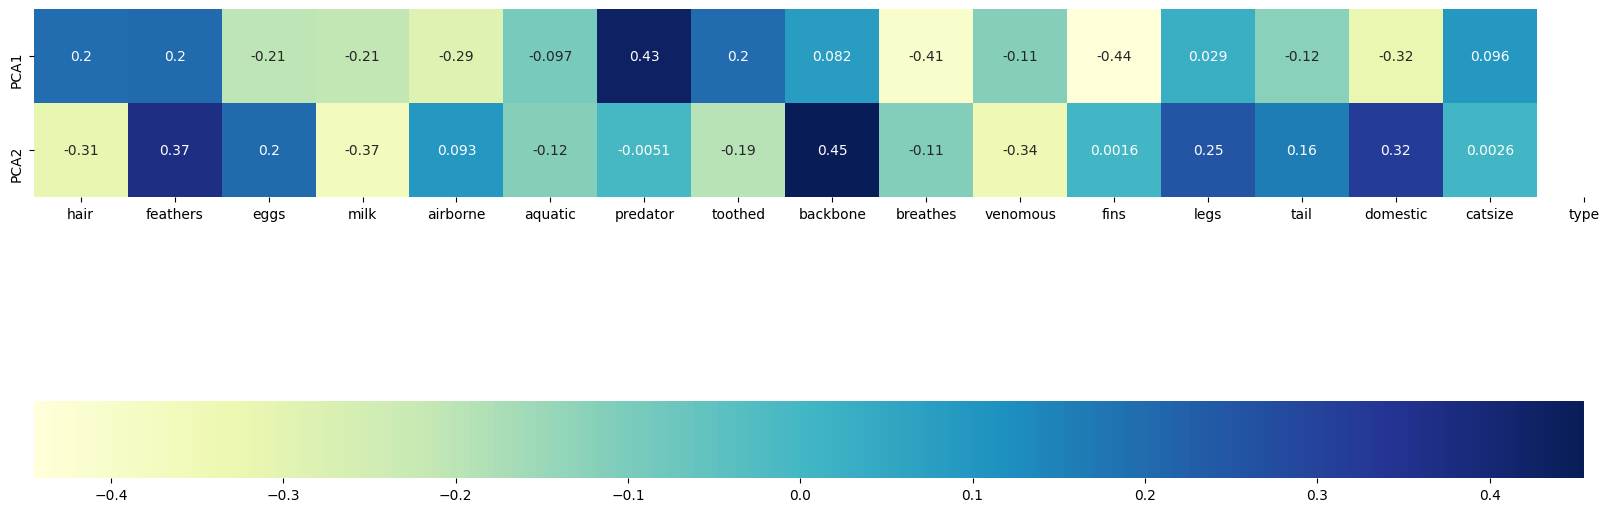

In [18]:
import seaborn as sb

ax = sb.heatmap(pca.components_[0:2,:],
                 cmap='YlGnBu',
                 #yticklabels=[ "PCA"+str(x) for x in range(1,len(pca.components_)+1)],
                 yticklabels=[ "PCA"+str(x) for x in range(1,3)],
                 xticklabels=list(df.columns),
                 annot=True,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

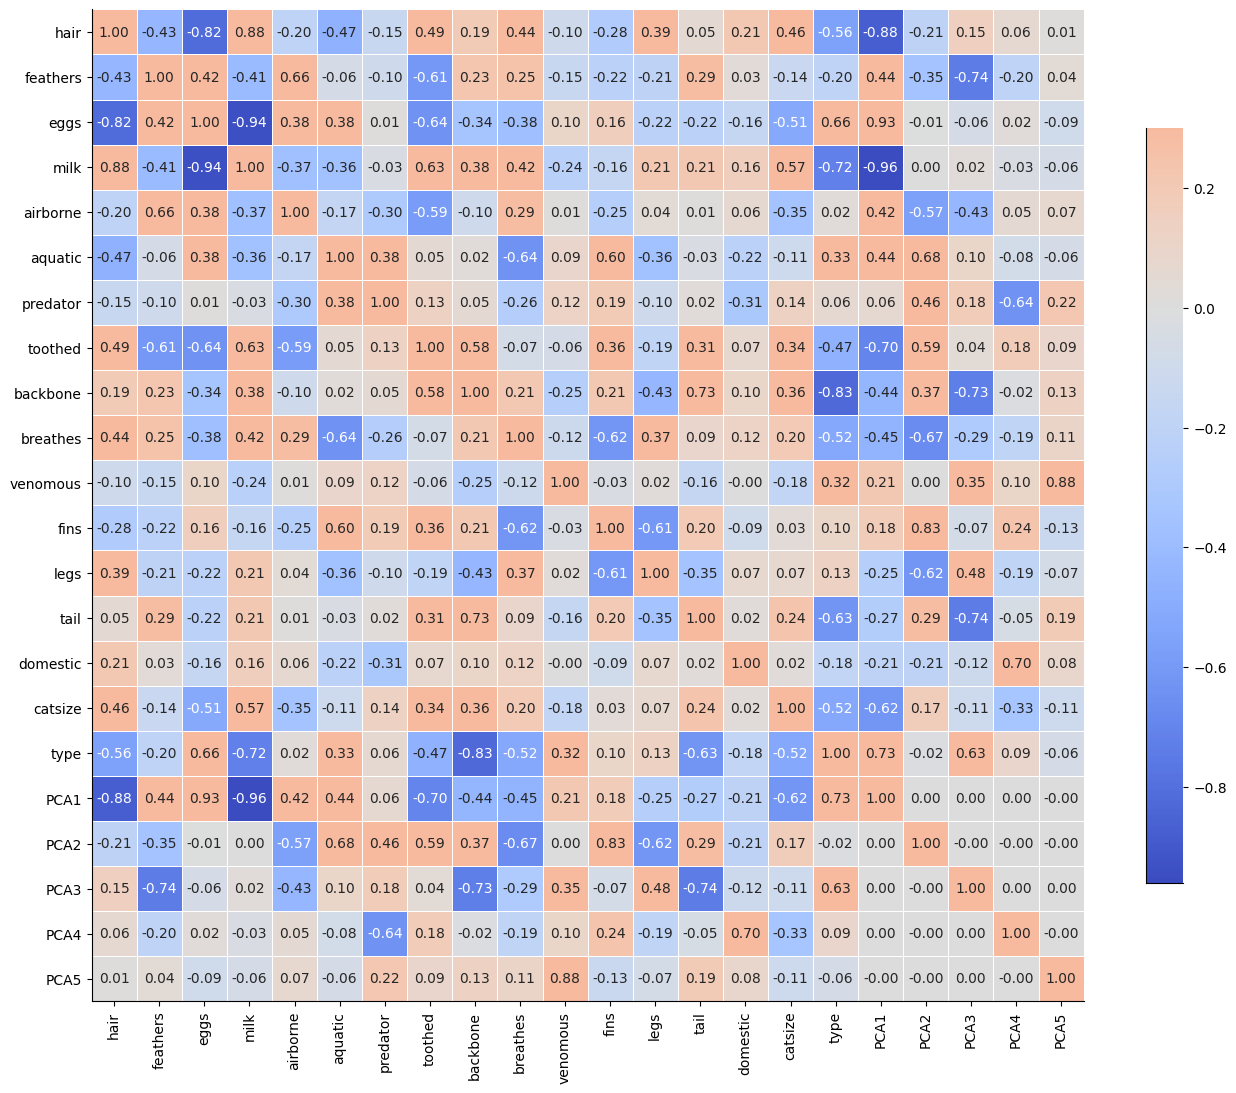

In [19]:
df[['PCA1','PCA2','PCA3','PCA4','PCA5']] = principalComponents[:,0:5]

corr = df.corr().round(2)

plt.figure(figsize=(16, 20))
g = sb.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"fontsize":10})
sb.despine()

plt.show()

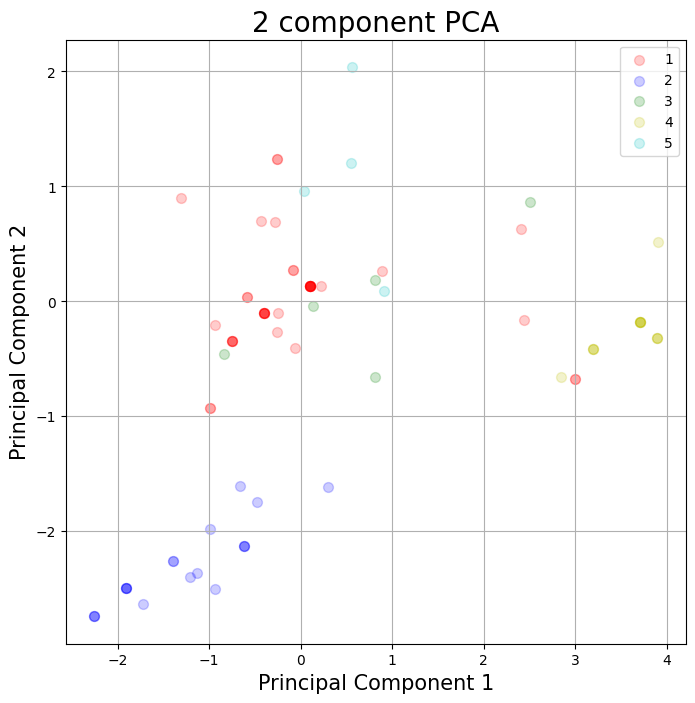

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 2, 3, 4, 5]
colors = ['r', 'b', 'g', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 1/5)
ax.legend(targets)
ax.grid()

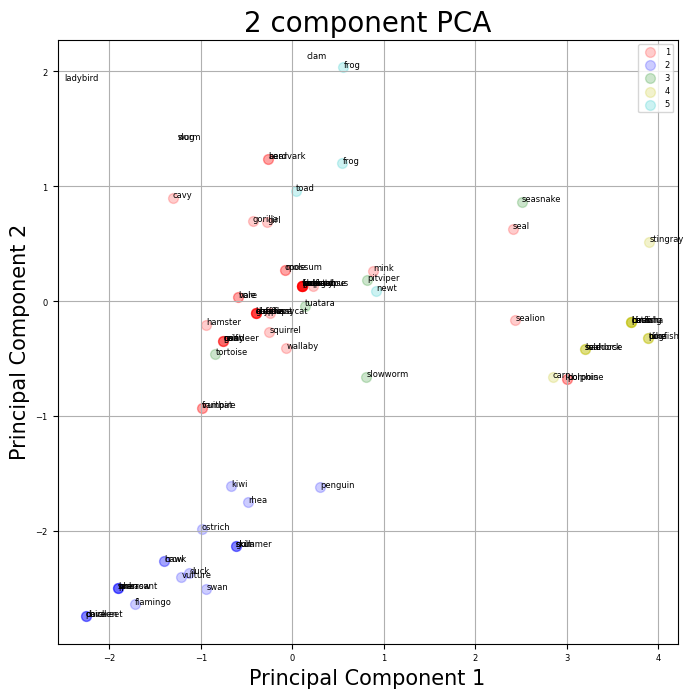

In [21]:
plt.rcParams.update({'font.size': 6})

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 2, 3, 4, 5]
colors = ['r', 'b', 'g', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 1/5)
ax.legend(targets)
ax.grid()

X=finalDf['principal component 1']
Y=finalDf['principal component 2']

annotations=finalDf.index

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

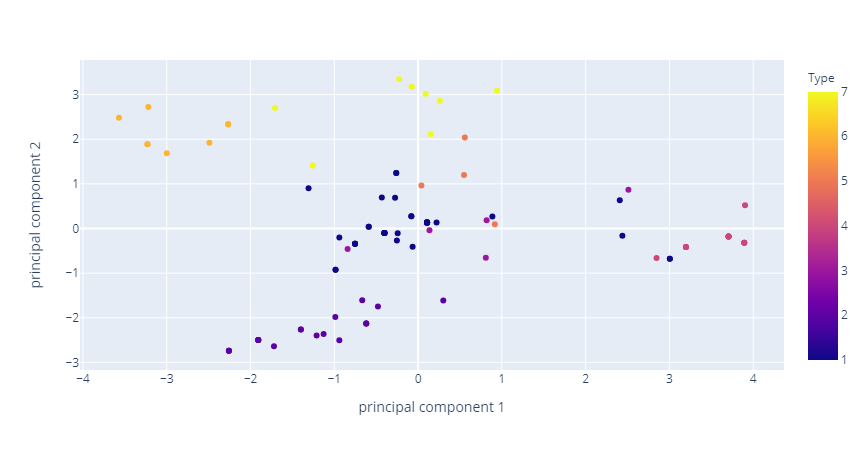

In [22]:
import plotly.express as px

fig_2d = px.scatter(
    finalDf, x='principal component 1', 
    y='principal component 2',
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)

fig_2d.show()

In [23]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)

X_transformed = mds.fit_transform(x)
X_transformed.shape

(101, 2)

In [24]:
mdsDf = pd.DataFrame(data = X_transformed[:,[0,1]], columns = ['mds component 1', 'mds component 2'], index=df.index)
finalMDSDf = pd.concat([mdsDf, df[['type']]], axis = 1)

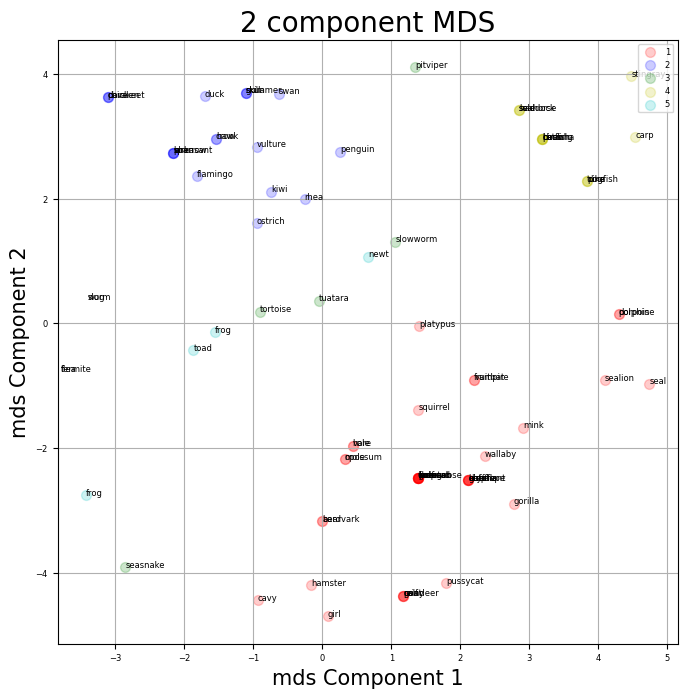

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('mds Component 1', fontsize = 15)
ax.set_ylabel('mds Component 2', fontsize = 15)
ax.set_title('2 component MDS', fontsize = 20)

targets = [1, 2, 3, 4, 5]
colors = ['r', 'b', 'g', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalMDSDf['type'] == target
    ax.scatter(finalMDSDf.loc[indicesToKeep, 'mds component 1']
               , finalMDSDf.loc[indicesToKeep, 'mds component 2']
               , c = color
               , s = 50
               , alpha = 1/5)
ax.legend(targets)
ax.grid()

X=finalMDSDf['mds component 1']
Y=finalMDSDf['mds component 2']

annotations=finalDf.index

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

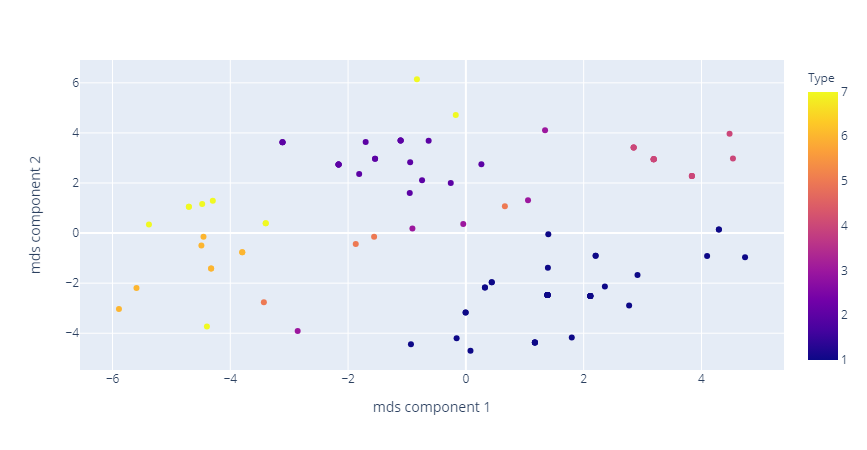

In [26]:
fig_2d = px.scatter(
    finalMDSDf, x='mds component 1', y='mds component 2',
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)

fig_2d.show()

In [27]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(x)
X_transformed.shape

(101, 2)

In [28]:
lleDf = pd.DataFrame(data = X_transformed[:,[0,1]], columns = ['lle component 1', 'lle component 2'], index=df.index)
finalLLEDf = pd.concat([lleDf, df[['type']]], axis = 1)

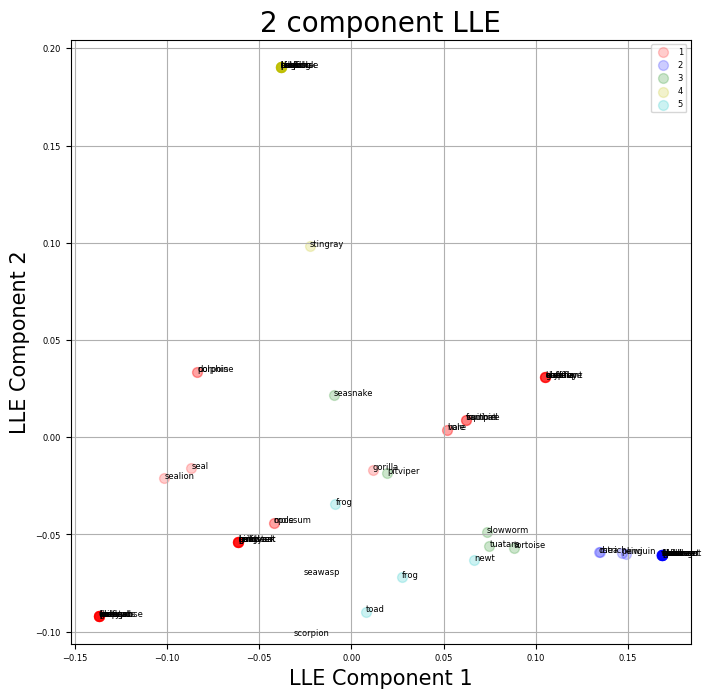

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LLE Component 1', fontsize = 15)
ax.set_ylabel('LLE Component 2', fontsize = 15)
ax.set_title('2 component LLE', fontsize = 20)

targets = [1, 2, 3, 4, 5]
colors = ['r', 'b', 'g', 'y', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalLLEDf['type'] == target
    ax.scatter(finalLLEDf.loc[indicesToKeep, 'lle component 1']
               , finalLLEDf.loc[indicesToKeep, 'lle component 2']
               , c = color
               , s = 50
               , alpha = 1/5)
ax.legend(targets)
ax.grid()

X=finalLLEDf['lle component 1']
Y=finalLLEDf['lle component 2']

annotations=finalDf.index

for i, label in enumerate(annotations):
    plt.annotate(label, (X[i], Y[i]))

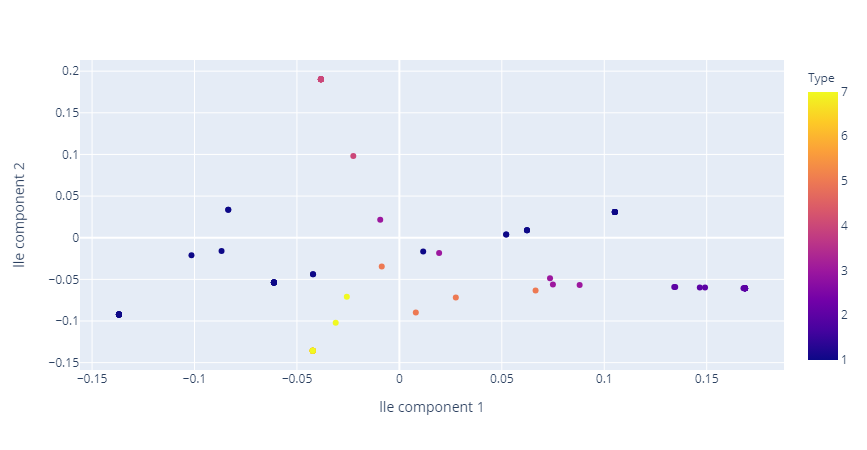

In [30]:
fig_2d = px.scatter(
    finalLLEDf, 
    x='lle component 1', 
    y='lle component 2',
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)

fig_2d.show()

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



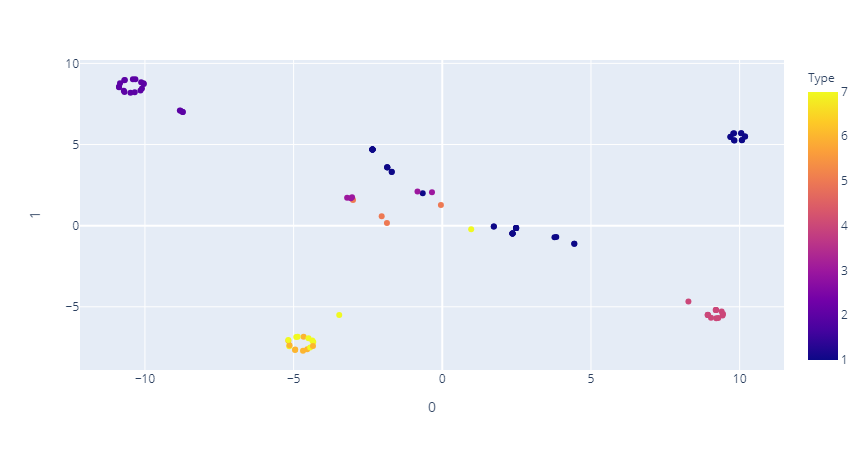

In [31]:
from sklearn.manifold import TSNE
import plotly.express as px


tsne_2d = TSNE(n_components=2, perplexity=15) #pokazati perplexity=3

proj_2d = tsne_2d.fit_transform(X_transformed[:,[0,1]])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)

fig_2d.show()

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



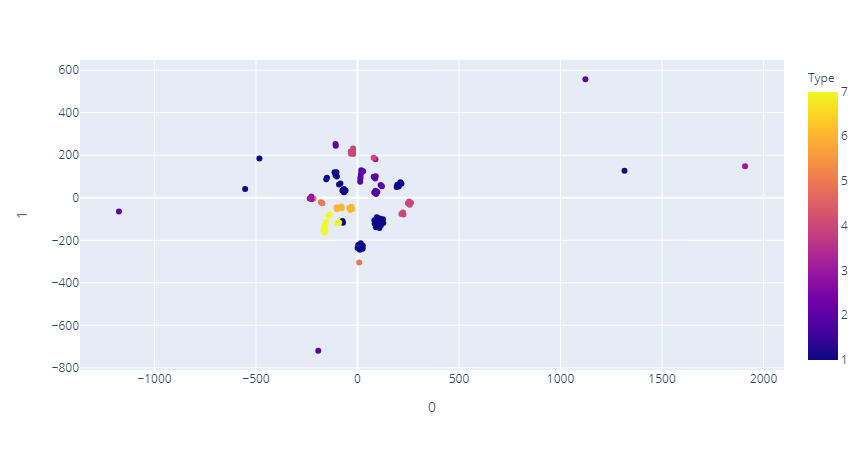

In [32]:
tsne_2d = TSNE(n_components=2, perplexity=3) #pokazati perplexity=3

proj_2d = tsne_2d.fit_transform(X_transformed[:,[0,1]])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)

fig_2d.show()

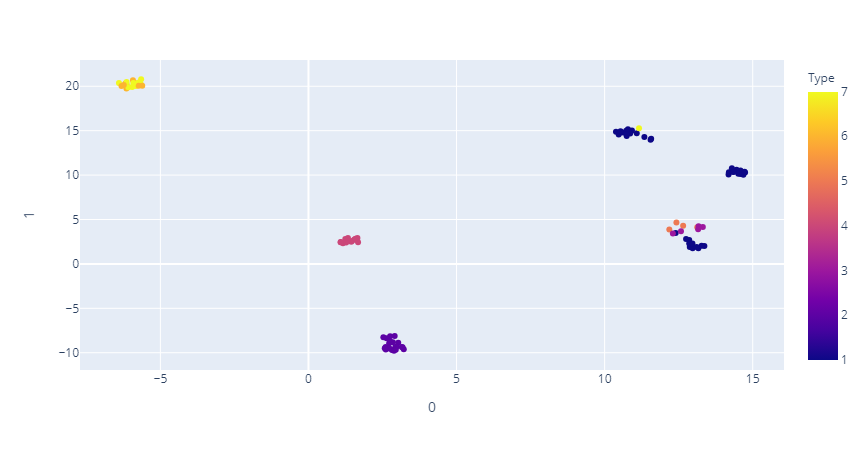

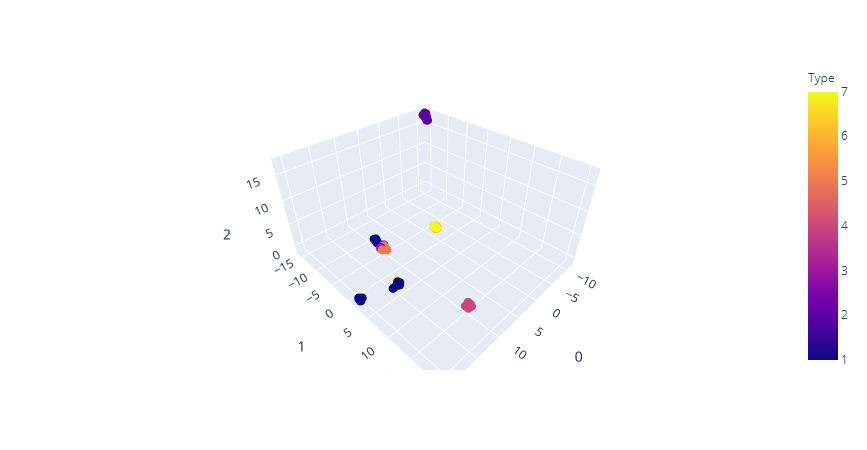

In [33]:
from umap import UMAP

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X_transformed[:,[0,1]])
proj_3d = umap_3d.fit_transform(X_transformed[:,[0,1]])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

n_neighbors

This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.

We can see that in practice by fitting our dataset with UMAP using a range of n_neighbors values. The default value of n_neighbors for UMAP (as used above) is 15, but we will look at values ranging from 2 (a very local view of the manifold) up to 200 (a quarter of the data).

min_dist

The min_dist parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation. This means that low values of min_dist will result in clumpier embeddings. This can be useful if you are interested in clustering, or in finer topological structure. Larger values of min_dist will prevent UMAP from packing points together and will focus on the preservation of the broad topological structure instead.

The default value for min_dist (as used above) is 0.1. We will look at a range of values from 0.0 through to 0.99.

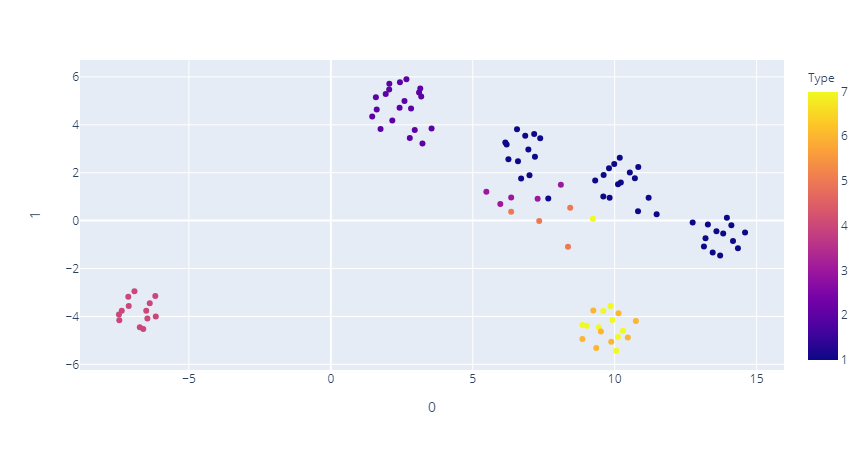

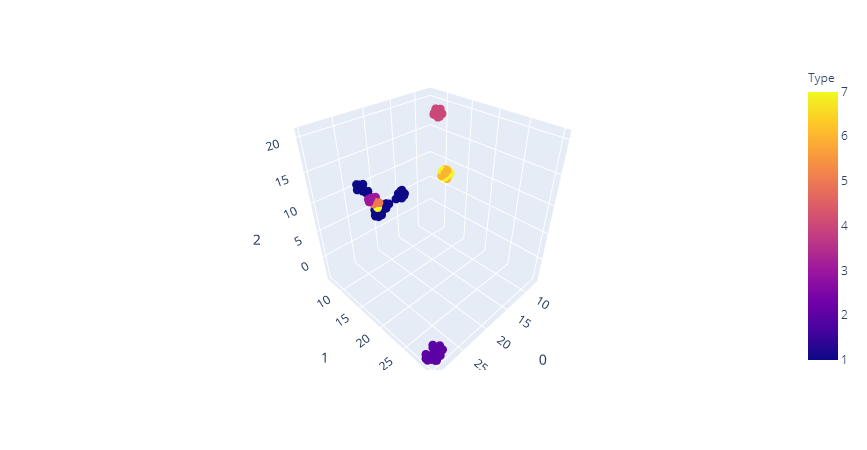

In [34]:
umap_2d = UMAP(n_neighbors=20, min_dist=0.7, n_components=2, init='random', random_state=0)#default n_neighbors je 15
umap_3d = UMAP(n_neighbors=20, min_dist=0.7, n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(X_transformed[:,[0,1]])
proj_3d = umap_3d.fit_transform(X_transformed[:,[0,1]])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\kocha\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



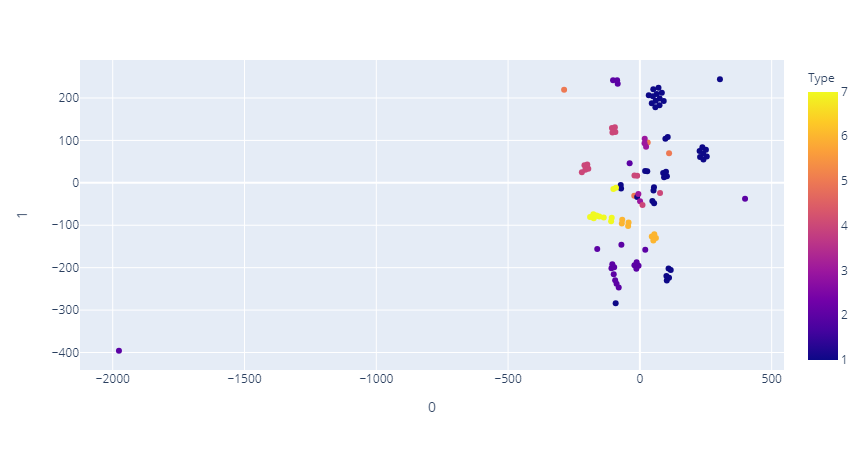

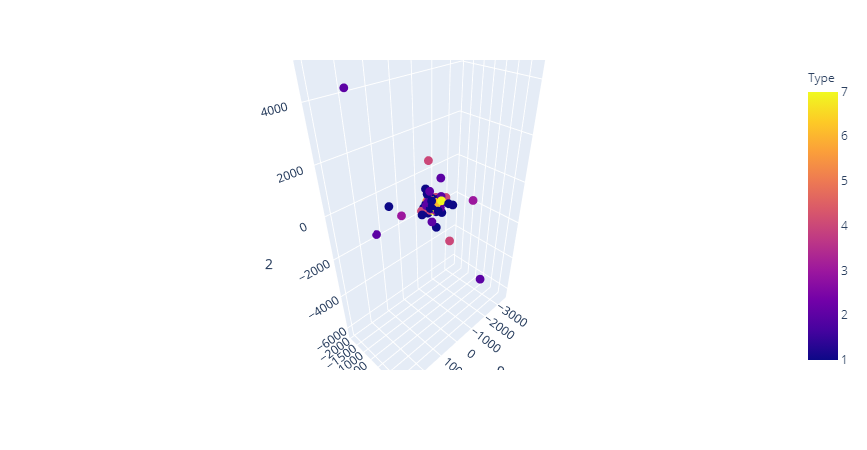

In [35]:
from sklearn.manifold import TSNE

proj_2d = TSNE(n_components=2, perplexity=3).fit_transform(X_transformed[:,[0,1]])
proj_3d = TSNE(n_components=3, perplexity=3).fit_transform(X_transformed[:,[0,1]])

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['type'], 
    labels={'color': 'Type'},
    hover_name = df.index
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()